In [1]:
#판다스 라이브러리 불러오기
import pandas as pd
import matplotlib as mpl
import matplotlib.pylab as plt
import numpy as np 
import seaborn as sns

file_path= 'C:/data/exam_sample_ActionLearning3.csv' #파일 불러오기

df = pd.read_csv(file_path) #파일 읽고 저장
df

,student_no,class,science,english,math,Pass,level
0,1,A,92,98,97,1,A+
1,2,A,62,66,65,0,D+
2,3,A,81,86,84,1,B
3,4,A,73,72,71,0,C
4,5,B,65,66,69,0,D+
5,6,B,86,89,87,1,C+
6,7,B,91,90,92,1,A
7,8,B,77,78,76,0,C+
8,9,C,95,98,99,1,A+
9,10,C,83,82,85,1,B


epoch W b cost
0 [-109425.51] [-1258.4684] 78874440000000.0
1 [1.4402995e+08] [1761489.9] 1.3664837e+20
2 [-1.8957756e+11] [-2.3184335e+09] 2.3674059e+26
3 [2.49529e+14] [3.051608e+12] 4.1014826e+32
4 [-3.284393e+17] [-4.0166392e+15] inf
5 [4.32304e+20] [5.2868494e+18] inf
6 [-5.6901454e+23] [-6.9587477e+21] inf

=== Test ===
X: 65.0 Y: [-3.6992905e+25]
X: 72.5 Y: [-4.1260515e+25]


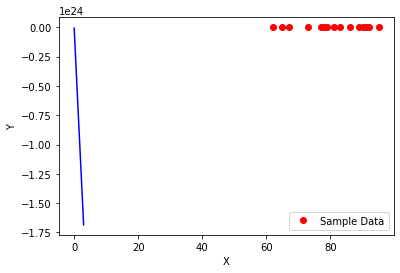

In [29]:
import tensorflow as tf
import matplotlib.pyplot as plt

X = df.science #X는 독립변수
Y = df.math  #Y는 종속변수

# W, b를 -1.0~1.0 사이에 균등분포 갖는 shpae 1의 변수형 텐서로 설정
W = tf.Variable(tf.random.uniform([1], 60.0, 90.0))
b = tf.Variable(tf.random.uniform([1], 60.0, 90.0))

# 텐서플로우에 기본적으로 포함되어 있는 함수를 이용해 경사 하강법 최적화를 수행
#학습률은 0.1로 고정
optimizer = tf.compat.v1.train.GradientDescentOptimizer(learning_rate=0.1)
#optimizer =tf.optimizers.SGD(learning_rate=0.1)
#optimizer =tf.optimizers.Adam(learning_rate=0.2)

# 비용 함수 계산
@tf.function()
def cost_eval():
 # y = W(가중치 ) * x + b (bias , 편향)
 # W 와 X 가 행렬이 아니므로 tf.matmul 이 아니라 기본 곱셈 기호를 사용
 hypothesis = W * X + b
 # mean(h - Y)^2 : 예측값과 실제값의 거리를 비용(손실) 함수로 계산.
 cost = tf.reduce_mean(tf.square(hypothesis - Y))
 return cost

print("epoch W b cost")
# 최적화를 7번 수행
for epoch in range(7):

 # 비용을 최소화 하는 것이 최종 목표
 optimizer.minimize(cost_eval, var_list=[W,b])
 # 손실, 가중치, 편향을 출력
 # numpy()함수는 변수의 배열만 출력
 print(epoch, W.numpy(), b.numpy(), cost_eval().numpy())
 # 최적화가 완료된 모델에 테스트 값을 넣고 결과가 잘 나오는지 확인.
print("\n=== Test ===")
x=65.0
print('X:', x, 'Y:', (W * x + b).numpy())
x=72.5
print('X:', x, 'Y:', (W * x + b).numpy())
# 그래프 그리기 위해 새로운 X값을 입력
new_X = tf.range(0, 3, 0.05)
# 선형 회귀직선을 이용하여 예측 Y값 계산
new_Y = W*new_X+b
plt.plot(X,Y,'ro', label='Sample Data') # 'ro'는 red circle
plt.plot(new_X, new_Y,'b-')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

epoch a0 a1 a2 cost
0 [-6120.6533] [-512218.53] [-42996564.] 8.475849e+22
1 [5.6636385e+09] [4.6957478e+11] [3.9420074e+13] 7.1244375e+34
2 [-5.1925317e+15] [-4.3051512e+17] [-3.6141077e+19] inf
3 [4.760613e+21] [3.9470448e+23] [3.3134826e+25] inf
4 [-4.36462e+27] [-3.618726e+29] [-3.037864e+31] inf
5 [4.001567e+33] [3.317717e+35] [inf] inf
6 [-inf] [-inf] [nan] nan

=== Test ===
X: 65.0 Y: [nan]
X: 72.5 Y: [nan]


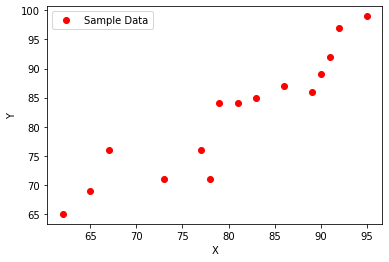

In [26]:
import tensorflow as tf
import matplotlib.pyplot as plt

X = df.science #X는 독립변수
Y = df.math  #Y는 종속변수

a0 = tf.Variable(tf.random.uniform([1], 40.0, 80.0))
a1 = tf.Variable(tf.random.uniform([1], 40.0, 80.0))
a2 = tf.Variable(tf.random.uniform([1], 40.0, 80.0))
optimizer = tf.compat.v1.train.GradientDescentOptimizer(learning_rate=0.01)
#optimizer =tf.optimizers.Adam(learning_rate=0.07)
#optimizer =tf.optimizers.SGD(learning_rate=0.01)

@tf.function()
def cost_eval():
 # y = a0+a1*x+a2*x^2 (2차함수)
 # W 와 X 가 행렬이 아니므로 tf.matmul 이 아니라 기본 곱셈 기호를 사용
 hypothesis = a0+a1*X+(a2*(X**2))
 cost = tf.reduce_mean(tf.square(hypothesis - Y))
 return cost

print("epoch a0 a1 a2 cost")
# 최적화를 7번 수행
for epoch in range(0,7, 1):

 # 손실 함수를 작성.
 # mean(h - Y)^2 : 예측값과 실제값의 거리를 비용(손실) 함수로 계산.

 # 텐서플로우에 기본적으로 포함되어 있는 함수를 이용해 최적화를 수행
 # 비용을 최소화 하는 것이 최종 목표
 optimizer.minimize(cost_eval, var_list= [a0,a1,a2])
 # 손실, 가중치, 편향을 출력
 print(epoch, a0.numpy(), a1.numpy(), a2.numpy(), cost_eval().numpy())
 # 최적화가 완료된 모델에 테스트 값을 넣고 결과가 잘 나오는지 확인.
print("\n=== Test ===")
x=65.
print('X:', x, 'Y:', (a0+a1*x+(a2*(x**2))).numpy())
x=72.5
print('X:', x, 'Y:', (a0+a1*x+(a2*(x**2))).numpy())
# 그래프 그리기 위해 새로운 X값을 입력
new_X = tf.range(0, 3, 0.05)
# 비선형 회귀직선을 이용하여 예측 Y값 계산
new_Y = a0+a1*new_X+(a2*(new_X**2))
plt.plot(X,Y,'ro', label='Sample Data') # 'ro'는 red circle
plt.plot(new_X, new_Y,'b-')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

In [68]:
import pandas as pd 
from sklearn import model_selection
from sklearn import metrics
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

df = pd.read_csv(file_path)
del df['student_no']
del df['class']
del df['level']
df

,science,english,math,Pass
0,92,98,97,1
1,62,66,65,0
2,81,86,84,1
3,73,72,71,0
4,65,66,69,0
5,86,89,87,1
6,91,90,92,1
7,77,78,76,0
8,95,98,99,1
9,83,82,85,1


In [81]:
x_data=df.iloc[:,0:3]
y_data=df.iloc[:,3]

x_data=x_data.values
y_data=y_data.values#인덱스 빼고 출력하고 싶을 때

print(x_data)
print(y_data)

[[92 98 97]
 [62 66 65]
 [81 86 84]
 [73 72 71]
 [65 66 69]
 [86 89 87]
 [91 90 92]
 [77 78 76]
 [95 98 99]
 [83 82 85]
 [67 65 76]
 [78 79 71]
 [79 82 84]
 [89 85 86]
 [90 91 89]]
[1 0 1 0 0 1 1 0 1 1 0 0 1 1 1]


In [88]:
import pandas as pd 
from sklearn import model_selection
from sklearn import metrics
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

df = pd.read_csv(file_path)

#불필요한 정보 삭제
del df['student_no']
del df['class']
del df['Pass']

x_data=df.iloc[:,0:3]
y_data=df.iloc[:,3]

x_data=x_data.values
y_data=y_data.values#인덱스 빼고 출력하고 싶을 때

x_train, x_test, y_train, y_test = model_selection.train_test_split(x_data, y_data, test_size=0.3)
#split을 할 때마다 값이 조금씩 달라짐

estimator = LogisticRegression(C=1, max_iter=10000)
estimator.fit(x_train, y_train)

#train score
y_predict = estimator.predict(x_train) 
score = metrics.accuracy_score(y_train, y_predict) #classification
print('train score: ', score)

#test 값
print("==== Test ====")
print(x_test[:5])
y_predict=estimator.predict(x_test[ :5])
print(y_predict)

#test score
y_predict = estimator.predict(x_test)
score = metrics.accuracy_score(y_test, y_predict)
print('test score: ', score)
#train score>test score이 가장 좋은 결과

train score:  1.0
==== Test ====
[[91 90 92]
 [83 82 85]
 [89 85 86]
 [62 66 65]
 [73 72 71]]
['A' 'C+' 'C+' 'D+' 'D+']
test score:  0.4


In [83]:
import pandas as pd 
from sklearn import model_selection
from sklearn import metrics
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

x_train, x_test, y_train, y_test = model_selection.train_test_split(x_data, y_data, test_size=0.3)
#의사결정나무 모델링 
#max_depth : default는 None으로 최대 깊이까지 학습해, 
# 과대적합 가능성이 있으므로 제한을 주면 좋다.
#max_leaf_nodes : 리프 노드의 최대 수
#min_samples_split : 분할되기 위해 노드가 가져야하는 최소 샘플 수
#min_samples_leaf : 리프 노드가 가져야할 최소 샘플 수
#max_features : 각 노드에서 분할에 사용할 변수의 최대 수
estimator = DecisionTreeClassifier(criterion='gini', max_depth=12, max_leaf_nodes=None, min_samples_split=2, min_samples_leaf=1, max_features=None)
estimator.fit(x_train, y_train)
# train 평가 
y_predict = estimator.predict(x_train) 
score = metrics.accuracy_score(y_train, y_predict)
print('train score: ', score)

print("==== Test ====")
print(x_test[:5])
y_predict=estimator.predict(x_test[ :5])
print(y_predict)

y_predict = estimator.predict(x_test) 
score = metrics.accuracy_score(y_test, y_predict)
print('test score: ', score)

train score:  1.0
==== Test ====
[[67 65 76]
 [62 66 65]
 [89 85 86]
 [90 91 89]
 [81 86 84]]
[0 0 1 1 1]
test score:  1.0
==== Test ====
[[67 65 76]
 [62 66 65]
 [89 85 86]
 [90 91 89]
 [81 86 84]]
[0 0 1 1 1]
